<a href="https://colab.research.google.com/github/sengorajkumar/machinehack-github-issues-classification/blob/main/github_issues_classification_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *
import torch
import fastai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fastai.__version__

'1.0.61'

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#import commands
#print(commands.getoutput('nvidia-smi'))

In [ ]:
defaults.device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/ml/github'
train = pd.read_json('/content/drive/My Drive/ml/github/embold_train.json')
test = pd.read_json('/content/drive/My Drive/ml/github/embold_test.json')
train_extra = pd.read_json('/content/drive/My Drive/ml/github/embold_train_extra.json')

Labels:
* Bug - 0
* Feature - 1
* Question - 2

In [ ]:
all_train = pd.concat([train, train_extra], axis=0)
all_train.reset_index(drop=True)

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0
...,...,...,...
449995,shield against invalid dates,makes'em crash the renderer for now :|\r \r da...,0
449996,fix the knight,"seriously, if you do just one thing this week...",0
449997,"portaudio playback binding crashes often, ubun...",appear to be very unstable. relates to 17,0
449998,add --db-path option for allowing user to spec...,add --db-path option with default value as ...,1


In [ ]:
#all_train["text"] = all_train["title"] + all_train["body"]

all_train["text"] = all_train[['title', 'body']].agg(' '.join, axis=1)
all_train = all_train.drop(['title', 'body'], axis=1)


In [ ]:
import re
def remove_url(text):
# function to remove urls
  return (re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',text))

def replace_r(text):
  return text.replace(' r ', ' ')

def remove_whitespace(text):
  return ' '.join(text.split())

def cleanString(text):
  return (re.sub('\W+',' ', text))

In [ ]:
all_train['text'] = all_train['text'].apply(remove_url)
all_train['text'] = all_train['text'].str.replace("[^a-zA-Z]", " ")
#all_train['text'] = all_train['text'].apply(replace_r)
all_train['text'] = all_train['text'].apply(cleanString)
all_train['text'] = all_train['text'].apply(remove_whitespace)

In [ ]:
print(all_train.iloc[1668][1])


webview openurl ios hi i fount this code for android to open webview urls outside of the app r r r exports webviewloaded function args r var webview args object r var tnswebviewclient r android webkit webviewclient extend r shouldoverrideurlloading function view url r if url null url startswith https r console log url r utilitymodule openurl url r return true r else r return false r r r r if isandroid r webview android getsettings setdisplayzoomcontrols false r webview android getsettings setbuiltinzoomcontrols false r webview android setwebviewclient new tnswebviewclient r r r r r it works fine is there a way to do the same for ios r r thank you r


In [ ]:
all_train['text'] = all_train['text'].apply(replace_r)

In [ ]:
print(all_train.iloc[1668][1])

all_train.head()

webview openurl ios hi i fount this code for android to open webview urls outside of the app r exports webviewloaded function args var webview args object var tnswebviewclient android webkit webviewclient extend shouldoverrideurlloading function view url if url null url startswith https console log url utilitymodule openurl url return true else return false r r if isandroid webview android getsettings setdisplayzoomcontrols false webview android getsettings setbuiltinzoomcontrols false webview android setwebviewclient new tnswebviewclient r r it works fine is there a way to do the same for ios r thank you r


,label,text
0,1,y zoom piano roll a y zoom on the piano roll w...
1,0,buggy behavior in selection screenshot from r
2,1,auto update feature hi r great job so far saen...
3,1,filter out noisy endpoints in logs i think we ...
4,0,enable pid on pid off alarm actions for arduin...


In [ ]:
mapping = {
  0: 'bug',
  1: 'feature',
  2: 'question'}

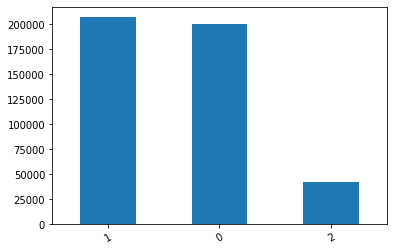

In [ ]:
all_train['label'].value_counts().plot.bar(rot=30);
#https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/

In [ ]:
print("Cuda available" if torch.cuda.is_available() is True else "CPU")

Cuda available


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(all_train, stratify = all_train['label'], test_size = 0.2)
df_trn.shape, df_val.shape

((360000, 2), (90000, 2))

In [ ]:
df_val

,label,text
12244,2,struct of look i can t find any information ab...
247113,0,manager component in one paddock is affecting ...
108950,1,add built in functions to perform cidr math ad...
148373,0,bike mode option broken picking the bike mode ...
3872,0,page shows when all addons in the second page ...
...,...,...
108091,0,in advanced search the th box always goes onto...
60964,0,node migration race condition situation r crea...
26050,1,new plugin for searchprovider a plugin for sea...
269721,0,fetching data from the localstorage on hard re...


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12954990441973664021, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7059032659068372335
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5248782246054723814
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13860248000
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7248923755845497142
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
xxbos test curtis feedback issue dl dt url dt dd code dt browser dt dd code mozilla macintosh intel mac os x applewebkit khtml like gecko chrome safari code dd dt user dt dd code d d e c bd cde code dd dl hr h note h p test curtis feedback issue p h screenshot h inline image may get filtered out by github img src data image png,0
xxbos bug client segfaults on incorrect game data from remote server environment r freeorion version f fd d a c af e c ca b e a operating system gentoo linux amd client ubuntu x server graphic card used nvidia gtx ti fetched as delete lines below that don t apply compiled from source r description when joining to the server on remote machine i got error r warning addresssanitizer,0
xxbos group restricted user can t create or re modify host attributes expected behavior detail view modification of host object attributes with restricted user r current behavior modification view simply stops working or just shows plain error page r possible solution better error page with user has not appropriate rights to access modify this object or the correct modification of the host object r steps to reproduce for bugs members,0
xxbos stripecontroller events stripe invalidrequesterror no such event evt xxunk p xxunk aj a similar object exists in test mode but a live mode key was used to make this request table tr th exception th td status request req p xxunk shd no such event evt xxunk p xxunk aj a similar object exists in test mode but a live mode key was used to make this request td,0
xxbos studio page error when editing catalog page in headless store bp create a new site using the headless store bp edit the store catalog by clicking on edit in the context nav or by right clicking on catalog under the example store and selecting edit r screen shot at am r change the title in the example below i added an s to the word catalog in the title,0


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 3.02E-02


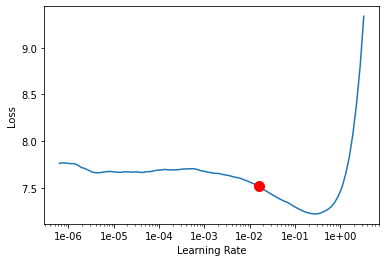

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(4, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,5.550703,5.370500,0.190683,50:29
1,5.515713,5.312184,0.195009,50:37
2,5.429603,5.149321,0.205997,50:42
3,5.338122,5.079990,0.211696,50:45


In [ ]:
learn.predict("this is not working", n_words=10)

'this is not working if this is present in the catalog results xxbos defect'

In [ ]:
learn.save_encoder('ft_enc_v3')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc_v3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (360000 items)
x: TextList
xxbos as an operator i want to deploy cf deployment with an ops file that causes cc uaa and bbs to use rds as their datastore story i d one rds or several mirrors story submitted on dec utc requester david sabeti estimate,xxbos invalid time axis of iso strings gets lost reported by steven c hankin on dec utc in this data set ferret recognizes that the time axis is invalid and substitutes an array of indices but it does not off the string variable array as a dependent variable as it should yes use note if no missing value or fillvalue attribute on variables will use nan yes show data currently set data sets default name title i j k l time crw dhw twice weekly global km xxunk crw hotspot twice weekly global km xxunk crw sst twice weekly global km xxunk crw xxunk twice weekly global km xxunk surface flag pixel characteristics flag xxunk yes show axis time name axis pts start end time axis span to cell edges th

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.51E-02


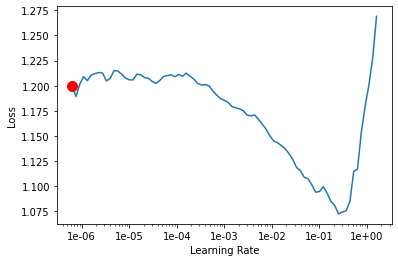

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(4, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.123663,1.065788,0.430367,14:45
1,1.041406,0.950430,0.559089,14:43
2,1.017347,0.917001,0.593389,14:42
3,0.999307,0.922770,0.586944,14:40


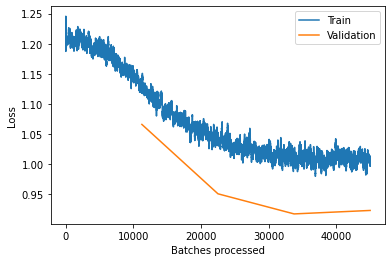

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.619223,0.531745,0.799644,17:19
1,0.563358,0.509742,0.812600,17:19
2,0.546374,0.485647,0.816633,17:19
3,0.539966,0.490344,0.818578,17:19


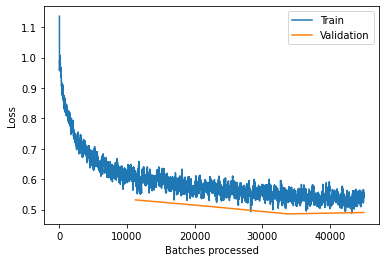

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.521008,0.476884,0.819167,36:15


Buffered data was truncated after reaching the output size limit.

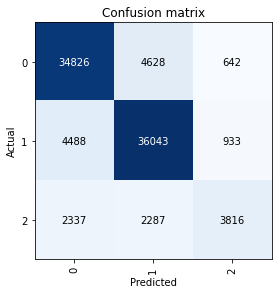

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()


In [ ]:
interp.most_confused()

[(0, 1, 4628),
 (1, 0, 4488),
 (2, 0, 2337),
 (2, 1, 2287),
 (1, 2, 933),
 (0, 2, 642)]

In [ ]:
learn.predict("homebrew not working")

(Category tensor(0), tensor(0), tensor([0.8512, 0.0299, 0.1189]))

In [ ]:
learn.export()

In [ ]:
learn.export('/content/drive/My Drive/ml/github/ULMFiT_classifier_model_extra_train_v3.pkl')


In [ ]:
my_path = learn.path

In [ ]:
my_path

PosixPath('.')

In [ ]:
my_learn = load_learner("/content/drive/My Drive/ml/github/", 'ULMFiT_classifier_model_extra_train_v3.pkl')

In [ ]:
pred1 = my_learn.predict("How to merge two columns on pandas dataframe")

In [ ]:
type(pred1)
print(pred1)

(Category tensor(2), tensor(2), tensor([0.0330, 0.3387, 0.6283]))


# **Prepare Test data to run prediction**

In [ ]:
test['body'] = test['body'].apply(remove_url)
#test['body'] = test['body'].astype('str') 
#test['body'] = test['body'].str.replace("\\r","")
test['body'] = test['body'].str.replace("[^a-zA-Z]", " ")
test['body'] = test['body'].apply(replace_r)
test['body'] = test['body'].apply(remove_whitespace)
test['title'] = test['title'].apply(remove_url)
test['title'] = test['title'].str.replace("[^a-zA-Z]", " ")
test['title'] = test['title'].apply(replace_r)
test['title'] = test['title'].apply(remove_whitespace)
test["text"] = test["title"] + test["body"]
test = test.drop(['title', 'body'], axis=1)



In [ ]:
test

,text
0,config question path specific environment vari...
1,crash indien volde simulator crasht als hij vo...
2,unable to mine rockssarkasmo starting today wh...
3,not all whitelists are processedcreate followi...
4,add ctx menu for idafree and idafreeassociated...
...,...
29995,closing a project with running simulations doe...
29996,missing table description on db db iseries as ...
29997,cases when notification should be shownnew mes...
29998,ip errors in idea client when syncingi see the...


## Run the predictions

In [ ]:
test['prediction'] = test['text'].apply(lambda row: str(my_learn.predict(row)[0]))

In [ ]:
test

,text,prediction
0,config question path specific environment vari...,2
1,crash indien volde simulator crasht als hij vo...,0
2,unable to mine rockssarkasmo starting today wh...,0
3,not all whitelists are processedcreate followi...,0
4,add ctx menu for idafree and idafreeassociated...,1
...,...,...
29995,closing a project with running simulations doe...,0
29996,missing table description on db db iseries as ...,0
29997,cases when notification should be shownnew mes...,0
29998,ip errors in idea client when syncingi see the...,0


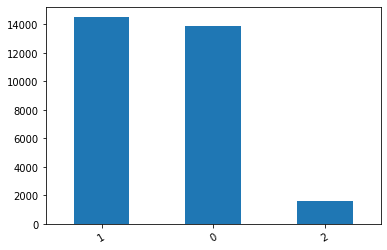

In [ ]:
test['prediction'].value_counts().plot.bar(rot=30);


In [ ]:
test.to_csv('/content/drive/My Drive/ml/github/prediction_extra_train_V3.csv')

In [ ]:
test = test.rename(columns={'prediction': 'label'})

In [ ]:
test

,text,label
0,config question path specific environment vari...,2
1,crash indien volde simulator crasht als hij vo...,0
2,unable to mine rockssarkasmo starting today wh...,0
3,not all whitelists are processedcreate followi...,0
4,add ctx menu for idafree and idafreeassociated...,1
...,...,...
29995,closing a project with running simulations doe...,0
29996,missing table description on db db iseries as ...,0
29997,cases when notification should be shownnew mes...,0
29998,ip errors in idea client when syncingi see the...,0


In [ ]:
test.to_csv('/content/drive/My Drive/ml/github/submission_v3_Oct13.csv', columns=['label'], index=False)